In [1]:
import tensorflow
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2919513552179130018
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 2249929524
locality {
  bus_id: 1
  links {
  }
}
incarnation: 8945867410993744397
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1650 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5"
]


In [2]:
!pip install seaborn
!pip install pandas

In [3]:
!pip list



Package                Version
---------------------- -------------------
absl-py                0.13.0
aiohttp                3.7.4
anyio                  2.2.0
argon2-cffi            20.1.0
astor                  0.8.1
astunparse             1.6.3
async-generator        1.10
async-timeout          3.0.1
attrs                  21.2.0
Babel                  2.9.1
backcall               0.2.0
bleach                 4.0.0
blinker                1.4
branca                 0.4.2
brotlipy               0.7.0
cached-property        1.5.2
cachetools             4.2.2
certifi                2021.5.30
cffi                   1.14.6
chardet                3.0.4
click                  8.0.1
colorama               0.4.4
coverage               5.5
cryptography           3.4.7
cycler                 0.10.0
Cython                 0.29.24
decorator              5.0.9
defusedxml             0.7.1
entrypoints            0.3
flatbuffers            20210226132247
folium                 0.12.1
gast         

### 자동완성타이핑기능이 안되어 개선

In [4]:
# !pip uninstall jedi

In [5]:
%config Completer.use_jedi = False

In [6]:
!pip list

Package                Version
---------------------- -------------------
absl-py                0.13.0
aiohttp                3.7.4
anyio                  2.2.0
argon2-cffi            20.1.0
astor                  0.8.1
astunparse             1.6.3
async-generator        1.10
async-timeout          3.0.1
attrs                  21.2.0
Babel                  2.9.1
backcall               0.2.0
bleach                 4.0.0
blinker                1.4
branca                 0.4.2
brotlipy               0.7.0
cached-property        1.5.2
cachetools             4.2.2
certifi                2021.5.30
cffi                   1.14.6
chardet                3.0.4
click                  8.0.1
colorama               0.4.4
coverage               5.5
cryptography           3.4.7
cycler                 0.10.0
Cython                 0.29.24
decorator              5.0.9
defusedxml             0.7.1
entrypoints            0.3
flatbuffers            20210226132247
folium                 0.12.1
gast         

In [7]:
%pwd

'C:\\Users\\hongr\\OneDrive\\바탕 화면\\Kaggle_House Prices'

In [8]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample = pd.read_csv('sample_submission.csv')

## 시각화 한글폰트 깨짐 방지

In [9]:
import matplotlib
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname = 'C:/Windows/Fonts/malgun.ttf').get_name()
matplotlib.rc('font', family = font_name)
matplotlib.rcParams['axes.unicode_minus'] = False

In [10]:
sample

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [11]:

df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [12]:
#통계치 확인
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [13]:
#결측치확인

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [14]:
#결측치 확인

isnull_df = df.isnull().sum()
isnull_df[isnull_df > 0].sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

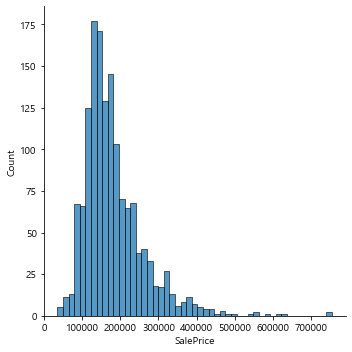

In [15]:
#y 분포 확인

# df['SalePrice'].hist()
sns.displot(df['SalePrice'])

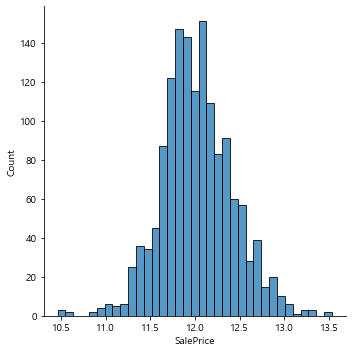

In [16]:
#로그로 변환해주기

sns.displot(np.log1p(df['SalePrice']))
df['SalePrice'] = np.log1p(df['SalePrice'])

In [17]:
df.shape

(1460, 81)

In [18]:
#결측값 처리

#id와 결측치가 많은 특성 제거하기

df.drop( ['Id', 'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis = 1, inplace=True)


In [19]:
df.shape

(1460, 75)

## 평균값으로 결측치 채우기

In [20]:
df.fillna( df.mean(), inplace=True)

## 원핫인코딩 해주기

In [21]:
df_oh = pd.get_dummies(df)
df.shape, df_oh.shape

((1460, 75), (1460, 271))

## 선형회귀

In [22]:
def get_rmse(model):
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test , pred)
    rmse = np.sqrt(mse)
    print('{0} 로그 변환된 RMSE: {1}'.format(model.__class__.__name__,np.round(rmse, 3)))
    return rmse

def get_rmses(models):
    rmses = [ ]
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

In [23]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

X = df_oh.drop('SalePrice', axis=1)
y = df_oh['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

tree_reg = RandomForestRegressor(random_state=0).fit(X_train, y_train)
lr_reg = LinearRegression().fit(X_train, y_train)
ridge_reg = Ridge().fit(X_train, y_train)
lasso_reg = Lasso().fit(X_train, y_train)

get_rmses( [tree_reg, lr_reg, ridge_reg, lasso_reg] )

RandomForestRegressor 로그 변환된 RMSE: 0.148
LinearRegression 로그 변환된 RMSE: 0.13
Ridge 로그 변환된 RMSE: 0.127
Lasso 로그 변환된 RMSE: 0.192


[0.14754364331576422,
 0.12953641682925313,
 0.12742500815858115,
 0.19230526756524885]

In [24]:
from sklearn.model_selection import cross_val_score

# 분할하지 않고 전체 데이터로 cross_val_score( ) 수행
# 모델별 CV RMSE값과 평균 RMSE 출력
def get_avg_rmse_cv(models):
    pass


# 모델의 RMSE값 을 확인

* 랜덤포레스트, 선형회귀, 릿지, 라쏘 모델을 반복문을 이용해서 손실함수값을 확인한다.
* 이때 cross_val_score 을 이용해서 **교차 검증** 을 수행한다.



In [25]:
# lr_reg, ridge_reg, lasso_reg 모델의 CV RMSE값 출력
models = [tree_reg, lr_reg, ridge_reg, lasso_reg]
for model in models:
  mse_list = -1 * cross_val_score(model, X, y, 
                                  scoring='neg_mean_squared_error', cv=5)
  rmse_list = np.sqrt(mse_list)
  rmse_avg = rmse_list.mean()
  print(f'{model.__class__.__name__} CV RMSE list: {np.round(rmse_list, 3)}')
  print(f'{model.__class__.__name__} CV RMSE AVG: {rmse_avg:.3f}')
  print()

RandomForestRegressor CV RMSE list: [0.139 0.157 0.147 0.13  0.153]
RandomForestRegressor CV RMSE AVG: 0.145

LinearRegression CV RMSE list: [0.135 0.165 0.168 0.111 0.198]
LinearRegression CV RMSE AVG: 0.155

Ridge CV RMSE list: [0.117 0.154 0.142 0.117 0.189]
Ridge CV RMSE AVG: 0.144

Lasso CV RMSE list: [0.161 0.204 0.177 0.181 0.265]
Lasso CV RMSE AVG: 0.198



## 하이퍼파라미터를 튜닝해야 하기 때문에 사용하는 sklearn의 모듈 

* BaseEstimator 는 get_params 및 set_params 의 구현을 제공해주는 모듈

* GridSearchCV란???

  다음의 블로그의 내용을 참고하면
  > 참고 : https://rudolf-2434.tistory.com/10
   
   최적의 하이퍼파라미터를 찾기위해 일일이 학습을 해야하는 수고를 덜어주는 모듈이라고 한다.
  

In [26]:
from sklearn.base import BaseEstimator
from sklearn.model_selection import GridSearchCV


def print_best_params(model, params):
    grid_search = GridSearchCV(model, param_grid = params, scoring = 'neg_mean_squared_error', cv = 5)
    
    grid_search.fit(X,y)
    rmse = np.sqrt(-1 * grid_search.best_score_)
    print(f'{model.__class__.__name__}CV RMSE의 평균 값{rmse:.4f}',
         f'alpha값: {grid_search.best_params_}')
    #포맷팅으로 들어가는 함수들을 잘 봐둬야 겠다. 
    
    return grid_search.best_estimator_

### ridge 와 lasso에서 중요한 영향을 미치는 변수는 alpha값

* 이 alpha 값들중 가장 좋은 것을 찾기위한 과정을 진행함
* 교차검증을 통해서 최적의 alpha값을 찾고 이 값을 이용.

In [27]:
param_ridge = { 'alpha':[0.05,0.1,1,5,8,10,12,15,20]}
param_lasso = { 'alpha':[0.001,0.005,0.008,0.05,0.03,0.1,0.5,1,5,10]}

print(print_best_params(ridge_reg,param_ridge))
print(print_best_params(lasso_reg,param_lasso))





RidgeCV RMSE의 평균 값0.1418 alpha값: {'alpha': 12}
Ridge(alpha=12)
LassoCV RMSE의 평균 값0.1420 alpha값: {'alpha': 0.001}
Lasso(alpha=0.001)


### 로그 변환된 RMSE를 출력

In [28]:
lr_reg = LinearRegression().fit(X_train,y_train)
ridge_reg = Ridge(alpha=12).fit(X_train,y_train)
lasso_reg = Lasso(alpha=0.001).fit(X_train,y_train)

get_rmses([lr_reg, ridge_reg, lasso_reg])

LinearRegression 로그 변환된 RMSE: 0.13
Ridge 로그 변환된 RMSE: 0.136
Lasso 로그 변환된 RMSE: 0.138


[0.12953641682925313, 0.13567682744280898, 0.13806118868552913]

## 왜도 (Skewness)
* 분포에서 비대칭을 나타내는 척도이다. 
    정규분포는 좌우가 대칭이므로 왜도가 0
    
 *Positive Skewness는 오른쪽 꼬리가 왼쪽보다 더 길 때를 의미한다. 평균(Mean)과 중위수(Median)가 Mode보다 크다.

 *Negative Skewness 왼쪽 꼬리가 오른쪽보다 더 길 때를 의미한다. 평균(Mean)과 중위수(Median)가 Mode보다 작다.
 
  > 참고: https://dining-developer.tistory.com/17

In [29]:
from scipy.stats import skew

f_index = df.dtypes[df.dtypes != 'object'].index  #object형태가 아닌 인덱스

skew_features = df[f_index].apply(lambda x: skew(x))  #왜도 값으로 변환
skew_features_top = skew_features[skew_features > 1] # 왜도 값은 1을 넘어서는 순간 부터 어느 한쪽으로 치우침

skew_features_top.sort_values(ascending=False)

MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
MasVnrArea        2.673661
LotFrontage       2.382499
OpenPorchSF       2.361912
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
dtype: float64

In [30]:
print(df['GrLivArea'].head())
print(df['GrLivArea'].describe())

0    1710
1    1262
2    1786
3    1717
4    2198
Name: GrLivArea, dtype: int64
count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64


## GrLivArea?
 ### 캐글데이터설명에서 찾아본 결과: Above grade (ground) living area square feet -> 지상(지상) 거실 면적 평방 피트
   * 넓이에 따라서 어떤 분포를 이루고 있는지 살펴보면 다음과 같다
 


In [31]:
import matplotlib
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname = 'C:/Windows/Fonts/malgun.ttf').get_name()
matplotlib.rc('font', family = font_name)
matplotlib.rcParams['axes.unicode_minus'] = False

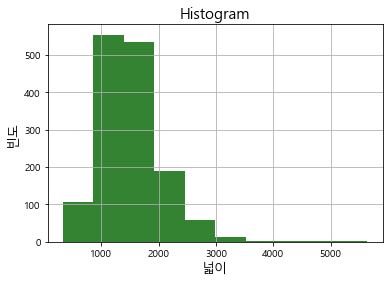

*빈도 array : [107. 554. 535. 189.  57.  12.   2.   2.   1.   1.]
*구간 array : [ 334.   864.8 1395.6 1926.4 2457.2 2988.  3518.8 4049.6 4580.4 5111.2
 5642. ]


In [32]:
plt.title("Histogram", fontsize=15)
frq, bins, fig = plt.hist(df['GrLivArea'], bins=10, alpha=.8, color='darkgreen')
plt.ylabel("빈도", fontsize=13)
plt.xlabel("넓이", fontsize=13)
plt.grid()
plt.show()
print("*빈도 array :", frq)
print("*구간 array :", bins)

In [33]:
df[skew_features_top.index]

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,LowQualFinSF,GrLivArea,BsmtHalfBath,KitchenAbvGr,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,60,65.0,8450,196.0,706,0,856,856,0,1710,0,1,0,61,0,0,0,0,0
1,20,80.0,9600,0.0,978,0,1262,1262,0,1262,1,1,298,0,0,0,0,0,0
2,60,68.0,11250,162.0,486,0,920,920,0,1786,0,1,0,42,0,0,0,0,0
3,70,60.0,9550,0.0,216,0,756,961,0,1717,0,1,0,35,272,0,0,0,0
4,60,84.0,14260,350.0,655,0,1145,1145,0,2198,0,1,192,84,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,0.0,0,0,953,953,0,1647,0,1,0,40,0,0,0,0,0
1456,20,85.0,13175,119.0,790,163,1542,2073,0,2073,0,1,349,0,0,0,0,0,0
1457,70,66.0,9042,0.0,275,0,1152,1188,0,2340,0,1,0,60,0,0,0,0,2500
1458,20,68.0,9717,0.0,49,1029,1078,1078,0,1078,0,1,366,0,112,0,0,0,0


### 로그변환으로 수치 조정

 * 로그변환시 np.log1p 를 하는게 좋은 이유에 대해서 좋은 정보를 찾았다.(아래블로그 참고)
    > https://suppppppp.github.io/posts/Why-Series-MDM-1/

In [34]:
df[skew_features_top.index] = np.log1p(df[skew_features_top.index])

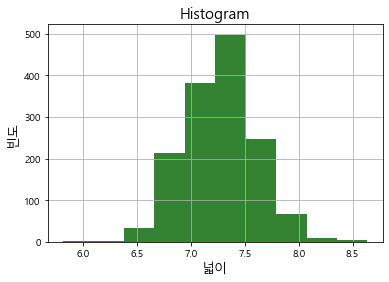

*빈도 array : [  2.   2.  32. 214. 383. 498. 248.  68.   9.   4.]
*구간 array : [5.81413053 6.09653459 6.37893865 6.66134271 6.94374677 7.22615082
 7.50855488 7.79095894 8.073363   8.35576706 8.63817112]


In [35]:
plt.title("Histogram", fontsize=15)
frq, bins, fig = plt.hist(df['GrLivArea'], bins=10, alpha=.8, color='darkgreen')
plt.ylabel("빈도", fontsize=13)
plt.xlabel("넓이", fontsize=13)
plt.grid()
plt.show()
print("*빈도 array :", frq)
print("*구간 array :", bins)

## 로그변환 후, 다시 원-핫인코딩 해주기



In [36]:
df_oh = pd.get_dummies(df)
print('기존:',df.shape,'원핫인코딩 후:', df_oh.shape)

X = df_oh.drop('SalePrice', axis = 1)
y = df_oh['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

param_ridge = {'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20]}
param_lasso = {'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1, 5, 10]}
ridge_reg = print_best_params(Ridge(), param_ridge)
lasso_reg = print_best_params(Lasso(), param_lasso)

기존: (1460, 75) 원핫인코딩 후: (1460, 271)
RidgeCV RMSE의 평균 값0.1275 alpha값: {'alpha': 10}
LassoCV RMSE의 평균 값0.1252 alpha값: {'alpha': 0.001}


## 이상치를 제거 해야한다
 * 원래 데이터를 다시 보기

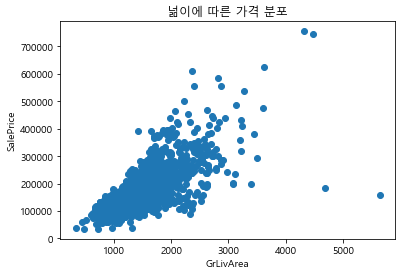

In [37]:
df_origin = pd.read_csv('train.csv')
plt.scatter(df_origin['GrLivArea'], df_origin['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title('넒이에 따른 가격 분포')
plt.show()

* 이상치를 보니

In [38]:
axis_x = df_oh['GrLivArea'] > np.log1p(4000)
axis_y = df_oh['SalePrice'] < np.log1p(500000)

df_oh[axis_x & axis_y]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
523,4.110874,4.875197,10.599007,10,5,2007,2008,6.637258,7.723562,0.0,...,0,1,0,0,0,0,0,0,0,1
1298,4.110874,5.749393,11.064887,10,5,2008,2008,6.680855,8.638525,0.0,...,0,1,0,0,0,0,0,0,0,1


* 이상치를 변수에 담아준다

In [39]:
outlier_index =df_oh[axis_x & axis_y].index
print(outlier_index)

Int64Index([523, 1298], dtype='int64')


In [40]:
print("원핫인코딩화한 DataFrame :", df_oh.shape)


df_oh.drop(outlier_index, axis=0, inplace=True)
print("이상치 삭제 후 shape :", df_oh.shape)



원핫인코딩화한 DataFrame : (1460, 271)
이상치 삭제 후 shape : (1458, 271)


## 이상치 제거 후 모델의 RMSE, alpha 값 확인

In [41]:
X = df_oh.drop('SalePrice', axis=1)
y = df_oh['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

param_ridge = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
param_lasso = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1, 5, 10] }
ridge_reg = print_best_params(Ridge(), param_ridge)
lasso_reg = print_best_params(Lasso(), param_lasso)

RidgeCV RMSE의 평균 값0.1125 alpha값: {'alpha': 8}
LassoCV RMSE의 평균 값0.1122 alpha값: {'alpha': 0.001}


In [42]:
get_rmses( [ridge_reg, lasso_reg] )

Ridge 로그 변환된 RMSE: 0.094
Lasso 로그 변환된 RMSE: 0.103


[0.09425371121432129, 0.1030371341487339]

In [43]:
pred_ridge = ridge_reg.predict(X_test)
pred_lasso = lasso_reg.predict(X_test)

pred = (0.6 * pred_ridge) + (0.4 * pred_lasso)
rmse = np.sqrt( mean_squared_error(y_test, pred) )
rmse

0.09656728001509855

# 부스팅기법 사용

In [44]:
# from xgboost import XGBRegressor
!pip install xgboost


In [45]:
import xgboost as xgb


# 모델 선언
xgb_model = xgb.XGBRegressor(learning_rate=0.1,max_depth=5,n_estimators=100,objective="reg:linear", seed=1000)

# 모델 훈련
# xgb_model.fit(X_train, y_train, eval_metric='rmse',verbose = True, eval_set = [(X_test, y_test)])
xgb_model.fit(X_train, y_train)
# 모델 예측
xgb_pred = xgb_model.predict(X_test) 
# xgb_pred = xgb_model.predict(test)
# y_pred


print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)
print(test.shape)
print(xgb_pred.shape)

#모델 점수

xgb_model.score(X_train,y_train),xgb_model.score(X_test,y_test)

[23:27:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
(1166, 270) (1166,)
(292, 270) (292,)
(1459, 80)
(292,)


(0.9819761587947017, 0.9021576143816962)

# 1차_제출

* xgb만 이용해서 우선 제출

In [46]:
test['Id']

# sub = pd.DataFrame()
# sub['Id'] = test_ID
# sub['SalePrice'] = xgb_pred
# sub.to_csv('submission.csv',index=False)

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [47]:
xgb_pred = xgb_model.predict(X_test) 

sub_xgb = pd.DataFrame()
sub_xgb['Id'] = test['Id']
sub_xgb['SalePrice'] = xgb_pred



ValueError: Length of values (292) does not match length of index (1459)

In [ ]:
test.shape

# 다양한 모델 사용하기
-lightgbm import 안됨

In [48]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

ModuleNotFoundError: No module named 'lightgbm'